<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Electron/blob/main/Lab2_Electron_experiment_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab2 Electron in fields, Part IV: experiment timing

![Fig1](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig1%20Setup.png?raw=true)

[Part I](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Lab2_Thomson.ipynb): Reproduce vendor's experiments.
> [P3.8.5.1](https://www.leybold-shop.com/physics/physics-experiments/electricity/free-charge-carriers-in-a-vacuum/thomson-tube/investigating-the-deflection-of-electrons-in-electrical-and-magnetic-fields/vp3-8-5-1.html) Investigating the deflection of electrons in electrical and magnetic fields

> [P3.8.5.2](https://www.leybold-shop.com/physics/physics-experiments/electricity/free-charge-carriers-in-a-vacuum/thomson-tube/assembling-a-velocity-filter-wien-filter-to-determine-the-specific-electron-charge/vp3-8-5-2.html) Velocity filter (Wien filter)

[Part II](https://github.com/evgeny-kolonsky/Lab2_Electron/tree/main/CollectData) Collect data.

[Part III](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Lab2_Thomson2.ipynb) Data Analysis.

In [13]:
import numpy as np # math functions
import scipy # scientific functions
from scipy.stats import linregress # contains linregress (for linear regression)
import scipy.stats as stats
from scipy.optimize import curve_fit  # non-linear curve fitting
from scipy.optimize import minimize
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd # handling data structures (loaded from files)
from sklearn.metrics import r2_score # import function that calculates R^2 score
from sklearn.metrics import mean_squared_error as mse
import json, requests
import itertools
import numpy.polynomial.polynomial as poly


The goal of the experiment is to find value of charge to mass relation for electron ${e \over m}$.

Literature value:
$$
{e_0\over m_0} = 1.7588 \cdot 10^{11} {C \over \text{kg}}
$$

# Plan:



1. Make **Z**-experiment to record the beam line at zero deflection forces. This will be used later when performing W-experiment.

2. Make **E**-experiment using $U_a$ > 2 kV (variant: $U_p < U_a$). Compare trajectory with parabola. At this experiment researcher finds or checks losses coefficient $k_1$ (passport value $k_1 =0.75$), which will be used later when performing W-experiment.

3. Make **B**-experiment using $I$ > 100 mA. Compare trajectory with circle. Calculate $e/m$ with confidence intervals and compare with literature value ${e_0\over m_0} = 1.7588 \cdot 10^{11} {C \over \text{kg}}$. At this experiment researcher uses $k_2$ theoretical value $k_2 =0.7155$.

4. Make **W**-experiment using $U_a$ > 2 kV and $I$ > 100 mA. At this experiment  researcher sets $U_p$ and varies $I$ to make beam as close to zero-forces line (found earlier) as possible. Calculate $e/m$, confidence interval, and compare the result with literature value and results of B-experiment.

## Equipment



*   High Voltage Power Source LE Didaction, x2
*   Power Source TENMA, x1
*  Digital multimetr DMM
* Thomson tube on stand
* A pair of Helmholz rings
* Wires: Banana-Banana x11


![Fig2](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig2%20Setup.png?raw=true)

Check that equipments is correctly connected accoring to the scheme.

*   Make sure that high voltage supplies (HVS) central **switches** is in correct prosition: central position for the deflection voltage source, right position for the acceleration voltage source.
*   Make sure that **ground** sockets of HVSs are correctly connected.
* Make sure that Helmholz rings are connected in series.
* Set up DMM for direct current measurement (DCI mode). Do not trust to the Powers Source display readings.




In [14]:
# CONSTANTS
N = 320 # Helmholz ring coils
R = 6.7e-2 # Helmholz ring raduis
mu0 = scipy.constants.mu_0
k2 = (4/5)**1.5
d = 5.5e-2 #plates dist, cm
em_reference = 1.7588e11 # C/kg 

# Z - experiment

In this experiment only accelerating volatge $U_a$ is applied. The trajectory will be a straight line. We call it *zero forces line*.




## The coordinate system definition and zero corection

Let's place $(x,y)$ coordinates axes according tube screen gridlines (see the figure). To take into account that zero forces line may slightly differ from $x$-axis, as on the figure, we make correction by rotating  cooridinate system by small angle $\alpha$ between $x$-axis and zero forces line. This way we ensure that in the rotated coordinates system $(x', y')$ the line $x'=0$ corresponds to zero deflection force.

![Fig-coords](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Tubes_compare/coords.jpg?raw=true)

## To do:

1. Apply some accelerating voltage $U_a$. Note that the green line of electrone trajectory is straight line when no delflection forces are applied. 

2. Make a series of observations, changing  $U_a$. 

3. Calcualte correction angle $\alpha$. 

In [15]:
# PLACE MEASUREMENTS HERE
alpha = -0.15/9

# function to apply coordinates (x,y) rotation by angle alpha.
def rotate(x,y):
    cosa, sina = np.cos(alpha), np.sin(alpha)
    x1, y1 = x*cosa + y*sina, -x*sina + y*cosa   
    return x1, y1

# E - experiment

In this experiment both the accelerating volatge $U_a$ and deflection voltage $U_p$ are applied. The trajectory will be parabola form like this:
![Fig3](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Tubes_compare/01/20230607_112323.jpg?raw=true).


In the electric field an electron moves on a parabola-shaped
curve. If the electron is accelerated by a given anode voltage
$U_A$ and then passes through the electric field of a plate capacitor with the voltage $U_P$ and the distance between the
plates is $d$, the following applies for the path
$$ y = {E \over 4 U_a} x^2 \tag{1}$$.

On account of the construction of the tube, the electric field is
smaller then the value expected according to theory. This can
be taken into account in the experiment by a correction factor $k_1$: 
$$
E_{exp} = k_1 E_{theo}.
\tag{2}
$$
Therefore
$$
\frac{y}{U_P} = k_1 {x^2 \over 4 d U_A},
\tag{2.1}
$$

In E-experiemnt we find correction factor $k_1$.


## To do:

1. Apply accelerating voltage $U_a$ and deflection volatge $U_p$. For better accuracy keep $U_a > 2 \text{kV}$ and $|U_p| < U_a$. 

2. Read and write down coordinates of points on along the trajectory. Apply ccordinates rotation by $\alpha$, found in Z-experiment.

3. Make a series of observations. Apply positive and negative $U_p$. Calculate average $k_1$ using linear regression. 

We will use this result later during W-experiment.


In [16]:
# PLACE MEASUREMENTS HERE
# each line: Ua (kV), Up(kV), x (cm), y(cm)
measurements = '''
3 2.4 2 0.1
3 2.4 3 0.2
3 2.4 4 0.4
3 2.4 5 0.6
3 2.4 6 0.8
3 2.4 7 1.2
3 2.4 8 1.5
3 2.4 9 2.0
4 1.9 2 0
4 1.9 3 .1
4 1.9 4 .2
4 1.9 5 .3
4 1.9 6 .4
4 1.9 7 .6
4 1.9 8 .8
4 1.9 9 1.0
3 -2.1 2 -.1
3 -2.1 3 -.2
3 -2.1 4 -.4
3 -2.1 5 -.6
3 -2.1 6 -.9
3 -2.1 7 -1.2
3 -2.1 8 -1.6
3 -2.1 9 -2.0
4 -1.2 2 -.05
4 -1.2 3 -.1
4 -1.2 4 -.2
4 -1.2 5 -.3
4 -1.2 6 -.5
4 -1.2 7 -.7
4 -1.2 8 -.9
4 -1.2 9 -1.0
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, Up, x, y = data.T

x, y = rotate(x, y)

Ua *=1e3 #kV
Up *=1e3 #kV
x *=1e-2 #cm
y *=1e-2 #cm


yu = y / Up
xu = x**2 /4/Ua/d
fit = linregress(xu, yu)
k1 = fit.slope

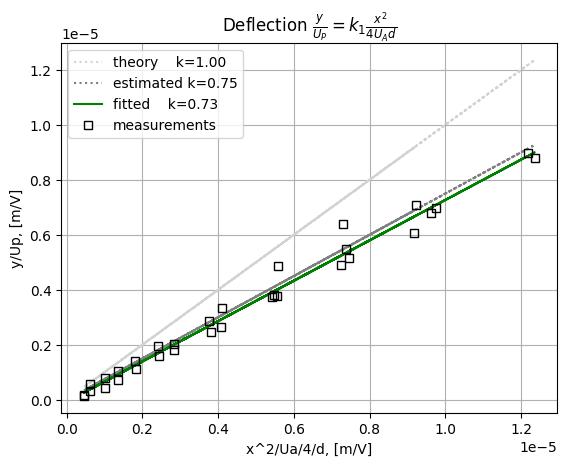

In [17]:
plt.plot(xu, 1.00*xu, label=f'theory    k={1.0:.2f}',c='lightgray', ls='dotted')
plt.plot(xu, 0.75*xu, label=f'estimated k={.75:.2f}',c='gray', ls='dotted')
plt.plot(xu, fit.intercept + fit.slope*xu, 
                      label=f'fitted    k={fit.slope:.2f}',c='green')
plt.plot(xu, yu, label='measurements', c='black', 
            marker='s', fillstyle='none', ls='', )
plt.legend()
plt.grid()
plt.xlabel('x^2/Ua/4/d, [m/V]')
plt.ylabel('y/Up, [m/V]')
plt.title(r'Deflection $\frac{y}{U_P} = k_1 \frac{x^2}{4 U_A d}$');

# B - experiment

In this experiment the deflection is achieved by applying field $B$ induced by current $I$. The trajectory will be a circle arc like this:
![Fig4](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Tubes_compare/01/20230607_112423.jpg?raw=true).

By measuring circle arc curvature we will calculate ${e \over m}$.

$$
B =  k_2 \cdot \mu_0 {N I\over R}, \quad k_2 = 0.7155
\tag{4}
$$

$$
{e \over m} = {2U_A\over (B\cdot r)^2},
\tag{5}
$$ 

$$
\text{curvature} = {1\over r} = {y'' \over (1 + y'^2)^{3\over 2}}
$$ 

## To do:

1. Apply accelerating voltage $U_a$ and current $I$, creating deflection magnetic field $B$. For better accuracy keep $U_a$ over 2 kV and below 5kV, and $|I|$ > 100 mA. 

2. Read and write down coordinates of points on along the trajectory. Again, apply zero correction by coordinates rotation.

3. Make a series of observations. Apply positive and negative $I$. Calculate average ${e \over m}$. 

In [18]:
# PLACE MEASUREMENTS HERE
# each line: Ua (kV), I(mA), x (cm), y(cm)
measurements = '''
2 133 2 .1
2 133 3 .2
2 133 4 .5
2 133 5 .7
2 133 6 .95
2 133 7 1.2
2 133 8 1.6
2 133 9 2.0
2 199 2 .2
2 199 3 .5
2 199 4 .8
2 199 5 1.1
2 199 6 1.5
2 199 7 2.0
2 199 8 2.5
2 -199 2 -.3
2 -199 3 -.6
2 -199 4 -.95
2 -199 5 -1.2
2 -199 6 -1.8
2 -199 7 -2.2
2 -199 7.5 -2.5 
3.7 -160 2 -.2
3.7 -160 3 -.3
3.7 -160 4 -.5
3.7 -160 5 -0.8
3.7 -160 6 -1.0
3.7 -160 7 -1.2
3.7 -160 8 -1.6
3.7 -160 9 -2.0
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, I, x, y = data.T

x, y = rotate(x, y)

Ua *=1e3 #kV
I *=1e-3 #mA
x *=1e-2 #cm
y *=1e-2 #cm

ems = []
for ua in np.unique(Ua):
  for current in np.unique(I):
    filter = (Ua==ua) & (I == current)
    if filter.sum() == 0:   # skip empty subsets
      continue 
    p = poly.Polynomial.fit(x[filter], y[filter], deg=3)
    p1 = p.deriv(1)
    p2 = p.deriv(2)
    curvature = np.abs(p2(x) / (1 + p1(x)**2) **1.5).mean()
    B = k2 * mu0 * N * current /R
    em = 2 * ua * curvature**2/B**2 
    ems.append(em)
    print(f'Ua: {ua*1e-3:.1f} kV, I: {current*1e3:.0f} mA, e/m: {em:.4e} C/kg')

ems = np.array(ems)

print(f'Average e/m in B-experiment: {ems.mean():.2e} C/kg')

Ua: 2.0 kV, I: -199 mA, e/m: 1.0629e+11 C/kg
Ua: 2.0 kV, I: 133 mA, e/m: 1.1268e+11 C/kg
Ua: 2.0 kV, I: 199 mA, e/m: 9.1647e+10 C/kg
Ua: 3.7 kV, I: -160 mA, e/m: 1.5466e+11 C/kg
Average e/m in B-experiment: 1.16e+11 C/kg


# W - experiment

In this experiment we will balance electrostatic and magnetic deflection forces.  The trajectory should be as close to zero-forces line as possible:
![Fig5](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Tubes_compare/01/20230607_112459.jpg?raw=true).



$$
{m v^2 \over 2} = e \cdot U_A , \quad v = {E \over B}
$$

$$
{e \over m} = {1\over 2 U_A} \left({E\over B}\right)^2
\tag{6}
$$

$$
E = k_1 {U_P\over d}
\tag{7}$$

## To do:

1. Apply accelerating voltage $U_a$, deflection voltage $U_p$. and current $I$. For better accuracy keep $U_a$ over 2 kV and below 5kV, $|U_p| < U_a$, and $|I|$ > 100 mA. Vary current $I$ to make trajectory as close to the zero forces line as possible. 

2. Use $k_1$ found in E-experiment.

3. Make a series of observations. Calculate average ${e \over m}$ and it's 95% confindence interval (CI). 





In [23]:
# PLACE MEASUREMENTS HERE
# each line: Ua (kV), Up (kV), I(mA)
measurements = '''
3.7 1.9 -160
3.0 2.0 -174 
2.6 2.1 -203
2.6 -2.2 203
3.4 -2.2 180
4.3 -2.9 180
4.3 -1.8 132
4.0 -3 214
3.8 -2.8 214
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, Up, I = data.T

Ua *=1e3 #kV
Up *=1e3 #kV
I *=1e-3 #mA

E = k1 * Up /d
B = k2 * mu0 * N * current /R 
em = (E/B)**2 / Ua /2
print(f'e/m: {em.mean():.4e} C/kg')

e/m: 1.9407e+11 C/kg


In [24]:
# create 95% confidence interval
ci = stats.t.interval(confidence=0.95, df=len(em)-1,
              loc=np.mean(em),
              scale=stats.sem(em))
print(ci)

(146600238210.3194, 241548775960.05096)
